### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
# data.head()

In [4]:
data.shape

(12684, 26)

In [5]:
# count for categorical/number columns
data.dtypes.reset_index().groupby(0).size()

0
int64      8
object    18
dtype: int64

In [6]:
col_max_rel_freq, col_card = {}, {}

for col in data.columns:
    df = data[col].value_counts(dropna=True, normalize=True).reset_index() # get relative frequency
    col_max_rel_freq[col] = (df.proportion.max()) * 100 # percent = proportion * 100
    col_card[col] = df.proportion.count() # same as size() as we create the this dataframe with dropna=True 
print(f'max_rel_freq by col: {col_max_rel_freq}')
print(f'cardinality by col : {col_card}')


max_rel_freq by col: {'destination': 49.53484705140334, 'passanger': 57.5922421948912, 'weather': 79.3834752444024, 'temperature': 51.466414380321666, 'time': 25.46515294859666, 'coupon': 31.5042573320719, 'expiration': 55.90507726269316, 'gender': 51.33238725953958, 'age': 20.916114790286976, 'maritalStatus': 40.2081362346263, 'has_children': 58.58561967833491, 'education': 34.30305897193314, 'occupation': 14.742983286029643, 'income': 15.870387890255442, 'car': 20.37037037037037, 'Bar': 41.32145980758528, 'CoffeeHouse': 27.15168043635197, 'CarryAway': 37.27758716987154, 'RestaurantLessThan20': 42.823004620041424, 'Restaurant20To50': 48.63545418167267, 'toCoupon_GEQ5min': 100.0, 'toCoupon_GEQ15min': 56.14947965941344, 'toCoupon_GEQ25min': 88.0873541469568, 'direction_same': 78.52412488174078, 'direction_opp': 78.52412488174078, 'Y': 56.84326710816777}
cardinality by col : {'destination': 3, 'passanger': 4, 'weather': 3, 'temperature': 3, 'time': 5, 'coupon': 5, 'expiration': 2, 'gende

             col_name  max_percent
20   toCoupon_GEQ5min   100.000000
22  toCoupon_GEQ25min    88.087354
2             weather    79.383475
24      direction_opp    78.524125
23     direction_same    78.524125


<Axes: title={'center': 'column name vs. max relative frequency %'}, xlabel='max relative frequency % calculated from value_counts with normalize=True', ylabel='column name'>

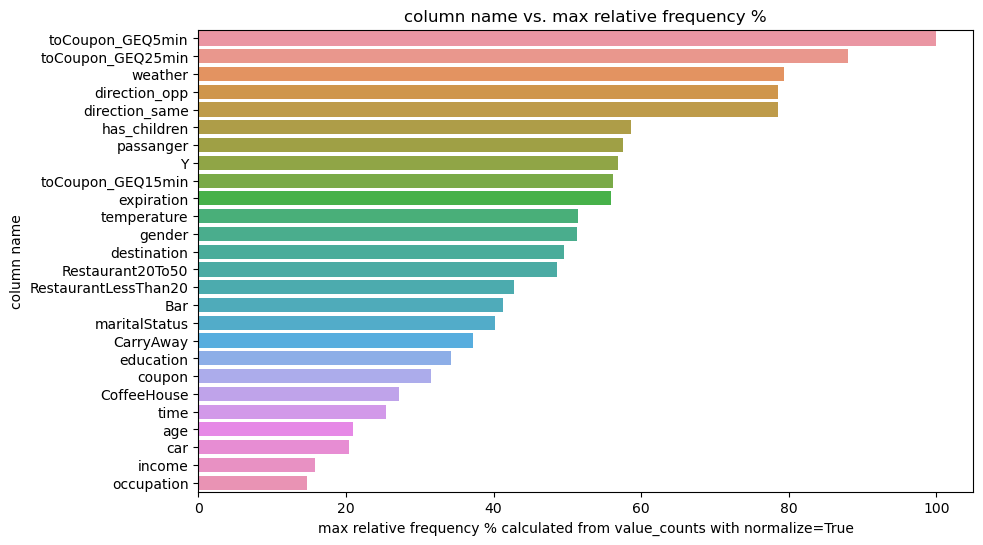

In [7]:
df2 = pd.DataFrame.from_dict(col_max_rel_freq, orient='index').reset_index()
df2 = df2.rename(columns={'index': 'col_name', 0: 'max_percent'})
df2 = df2.sort_values('max_percent', ascending=False)
print(df2.head(5)) # top 5

plt.figure(figsize=(10 ,6)) 
fig = sns.barplot(df2, y='col_name', x='max_percent', orient='h')
plt.xlabel(f'max relative frequency % calculated from value_counts with normalize=True')
plt.ylabel('column name')
plt.title(f'column name vs. max relative frequency %')
plt.savefig('images/colnum_name_vs_max_relative_frequency.png')
fig

      col_name  cardinality
12  occupation           25
13      income            9
8          age            8
11   education            6
14         car            5


<Axes: title={'center': 'column name vs. cardinality'}, xlabel='cardinality caculated from value_counts()', ylabel='column name'>

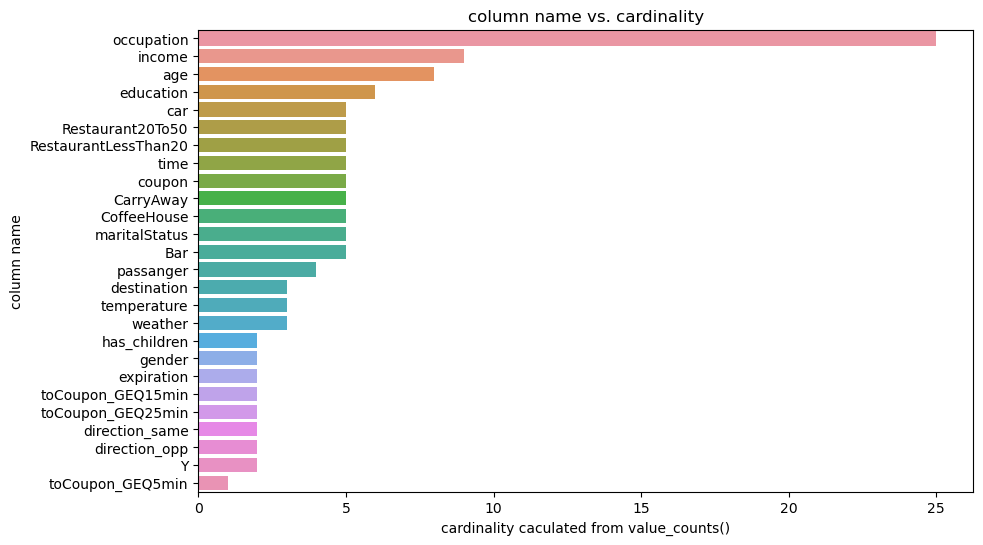

In [8]:
df3 = pd.DataFrame.from_dict(col_card, orient='index').reset_index()
df3 = df3.rename(columns={'index': 'col_name', 0: 'cardinality'})
df3 = df3.sort_values('cardinality', ascending=False)
print(df3.head(5)) # top 5

plt.figure(figsize=(10 ,6)) 
fig = sns.barplot(df3, y='col_name', x='cardinality', orient='h')
plt.xlabel('cardinality caculated from value_counts()')
plt.ylabel('column name')
plt.title(f'column name vs. cardinality')
plt.savefig('images/colnum_name_vs_cardinality.png')
fig


2. Investigate the dataset for missing or problematic data.

- fix typos of column name

In [9]:
data.rename(columns={'passanger': 'passenger'}, inplace=True)

- find duplicates
    - small number of missing data
    - keep the duplicates

In [10]:
print('total number of duplicates:', data.duplicated().sum())
print(f'percentabge of duplicates: {data.duplicated().sum() / data.shape[0] * 100:.2f}%')

total number of duplicates: 74
percentabge of duplicates: 0.58%


- find strange min/max
    - Not found

- find big diff between mean and median
    - Not found

In [11]:
data.select_dtypes(include=['int64', 'float64']).describe(percentiles=[.25, .5, .75])

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


- find strong relationships among numerical columns

Strong relationships among columns (threshold=0.7):


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


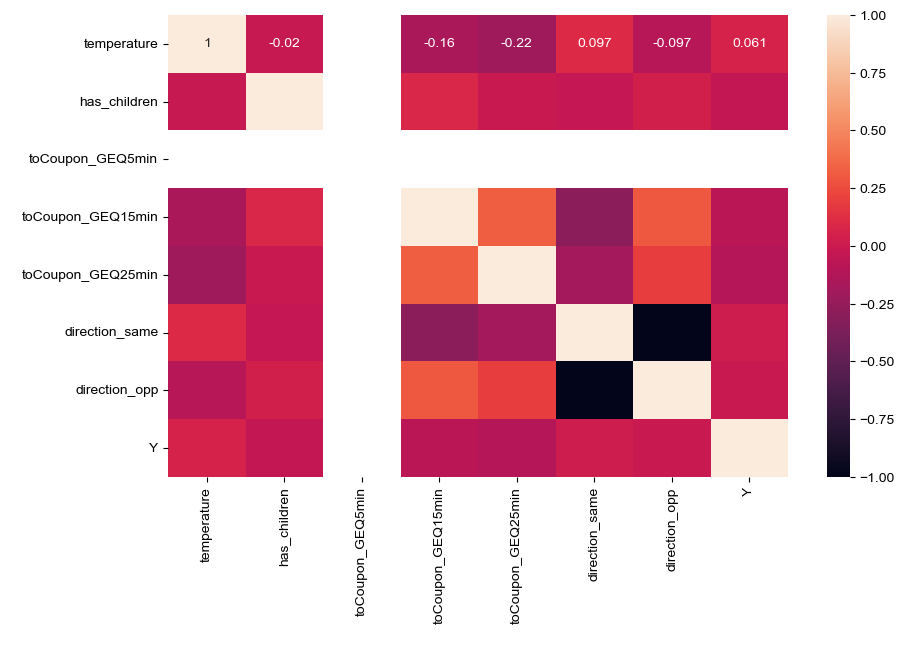

In [12]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
corr = data[numeric_columns].corr()
# print(corr)

# find strong relationships (absolute correlation > ?)
threshold = 0.7
strong_relationships = corr[abs(corr) > threshold]

print(f'Strong relationships among columns (threshold={threshold}):')
# print(strong_relationships)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
sns.set(font_scale=.9)


2.5 find high-cardinality categorical columns
- not found

In [13]:
threshold = 0.5
high_cardinality_columns = []

for col in data.columns:
    # Check if the column is categorical
    if data[col].dtype == 'object':
        # Calculate the ratio of unique values to total rows
        unique_ratio = data[col].nunique() / data.shape[0]
        # Check if the ratio exceeds the threshold
        if unique_ratio > threshold:
            high_cardinality_columns.append(col)

print("High-cardinality categorical columns:")
print(high_cardinality_columns)

High-cardinality categorical columns:
[]


2.6 find categorical variables with large percentages of records having a single value
- weather column

In [14]:
threshold = 0.75

categorical_large_percentage_single_value = []

for col in data.select_dtypes(include=['object']):
    # Calculate value counts
    value_counts = data[col].value_counts(normalize=True)
    # Check if the percentage of the dominant value exceeds the threshold
    if value_counts.iloc[0] > threshold:
        categorical_large_percentage_single_value.append(col)

print("Categorical variables with large percentages of records having a single value:")
print(categorical_large_percentage_single_value)

data.weather.value_counts()

Categorical variables with large percentages of records having a single value:
['weather']


weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

2.7 find relationships between two categorical variables    
- run chi-square test for each pair of categorical variables
- too many pairs reported

In [15]:
from scipy.stats import chi2_contingency

threshold = 0.05
strong_relationship = []
cols = data.select_dtypes(include=['object']).columns
for i in range(len(cols)):
    col1 = cols[i]
    for j in range(i+1, len(cols)):
        col2 = cols[j]
        contingency_table = pd.crosstab(data[col1], data[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        if p < threshold:
            strong_relationship.append([col1, col2])
print(f'Strong relationship between:')
for x, y in strong_relationship:
    print(f'({x}, {y})')

Strong relationship between:
(destination, passenger)
(destination, weather)
(destination, time)
(destination, coupon)
(destination, expiration)
(destination, maritalStatus)
(destination, occupation)
(destination, income)
(passenger, weather)
(passenger, time)
(passenger, coupon)
(passenger, expiration)
(passenger, gender)
(passenger, age)
(passenger, maritalStatus)
(passenger, education)
(passenger, occupation)
(passenger, income)
(passenger, car)
(passenger, Bar)
(passenger, CoffeeHouse)
(passenger, CarryAway)
(passenger, RestaurantLessThan20)
(passenger, Restaurant20To50)
(weather, time)
(weather, coupon)
(weather, expiration)
(weather, gender)
(weather, age)
(weather, education)
(weather, occupation)
(weather, income)
(weather, car)
(weather, CoffeeHouse)
(weather, CarryAway)
(weather, RestaurantLessThan20)
(weather, Restaurant20To50)
(time, coupon)
(time, expiration)
(time, maritalStatus)
(time, occupation)
(coupon, expiration)
(coupon, maritalStatus)
(expiration, maritalStatus)
(

3. Decide what to do about your missing data -- drop, replace, other...
- replace

In [16]:
cols_w_null = data.isnull().sum().reset_index().rename(columns={'index': 'col_name', 0: 'isnull_sum'})
# print(f'{cols_w_null!r}')
for idx, row in cols_w_null.query('isnull_sum > 0').iterrows():
    col, cnt = row.col_name, row.isnull_sum
    x = cnt / data.shape[0]
    mode = data[col].mode(dropna=True)[0]
    print(f'Percent of missing {col!a} records is {100*x:.2f}%, fill missing value with {mode!r}')
    # The mode of a set of values is the value that appears most often
    data[col].fillna(value=mode, inplace=True)

Percent of missing 'car' records is 99.15%, fill missing value with 'Mazda5'
Percent of missing 'Bar' records is 0.84%, fill missing value with 'never'
Percent of missing 'CoffeeHouse' records is 1.71%, fill missing value with 'less1'
Percent of missing 'CarryAway' records is 1.19%, fill missing value with '1~3'
Percent of missing 'RestaurantLessThan20' records is 1.02%, fill missing value with '1~3'
Percent of missing 'Restaurant20To50' records is 1.49%, fill missing value with 'less1'


3.1 Convert categorical columns to numerical values

In [17]:
txt = ['never', 'less1', '1~3', '4~8', 'gt8']
# use mean/avg from range
rank = [0, 0.5, 2, 6, 9]

data.Bar.replace(txt, rank, inplace=True)
data.CoffeeHouse.replace(txt, rank, inplace=True)
data.CarryAway.replace(txt, rank, inplace=True)
data.RestaurantLessThan20.replace(txt, rank, inplace=True)
data.Restaurant20To50.replace(txt, rank, inplace=True)

sampled_df = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].sample(n=5)
sampled_df

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
116,2.0,9.0,6.0,2.0,0.5
6715,0.0,2.0,2.0,2.0,2.0
1473,0.5,2.0,2.0,0.5,2.0
3130,6.0,0.5,2.0,2.0,0.5
3762,2.0,6.0,6.0,6.0,2.0


In [18]:
txt = [
    'Less than $12500',
    '$12500 - $24999', '$25000 - $37499',
    '$37500 - $49999', '$50000 - $62499', '$62500 - $74999',
    '$75000 - $87499', '$87500 - $99999',
    '$100000 or More'
]
# use upper bound from range
rank = [
    12500-1,
    24999, 37499,
    49999, 62499, 74999,
    87499, 99999,
    100000+1]

data['income'].replace(txt, rank, inplace=True)

sampled_df = data[['income']].sample(n=5)
sampled_df

,income
2957,49999
4962,100001
3681,49999
9146,37499
2837,62499


In [19]:
txt = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
rank = [21-1, 21, 26, 31, 36, 41, 46, 50+1]

data['age'].replace(txt, rank, inplace=True)

sampled_df = data[['age']].sample(n=5)
sampled_df

,age
5980,36
9277,26
5056,21
8339,41
2068,36


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

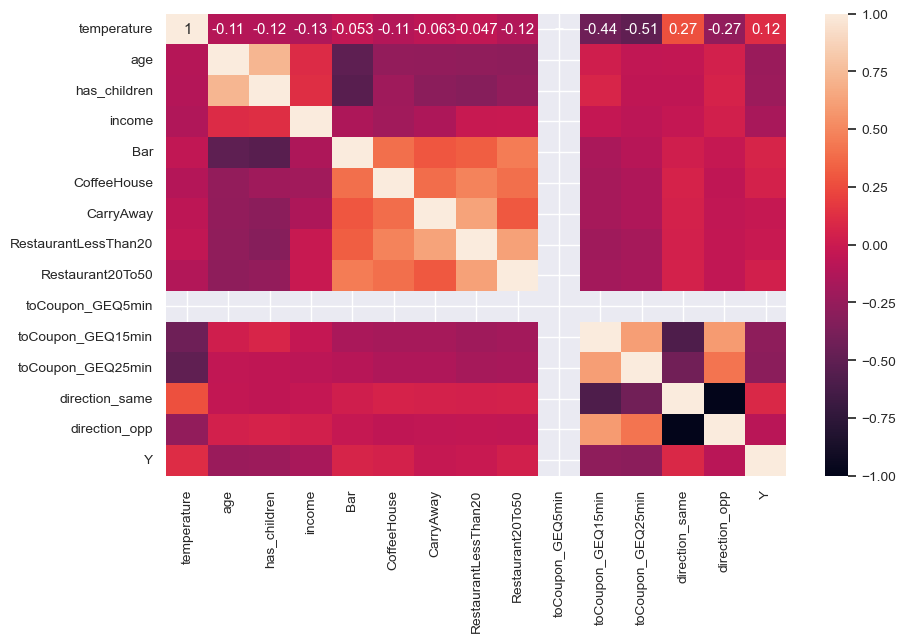

In [20]:
plt.figure(figsize=(10, 6))
df2 = data[data.select_dtypes("number").columns].corr()
fig = sns.heatmap(df2.corr(), annot=True)
fig

4. What proportion of the total observations chose to accept the coupon? 



In [21]:
ans = data.query('Y == 1').shape[0] / data.shape[0] * 100
ans = f'{ans:.2f}%'
print(ans)

56.84%


5. Use a bar plot to visualize the `coupon` column.

In [22]:
# disable sns FutureWarning
import warnings
warnings.filterwarnings('ignore')

<Axes: title={'center': 'Visualization of "coupon" Column'}, xlabel='Coupon Type', ylabel='Coupon Occurrences'>

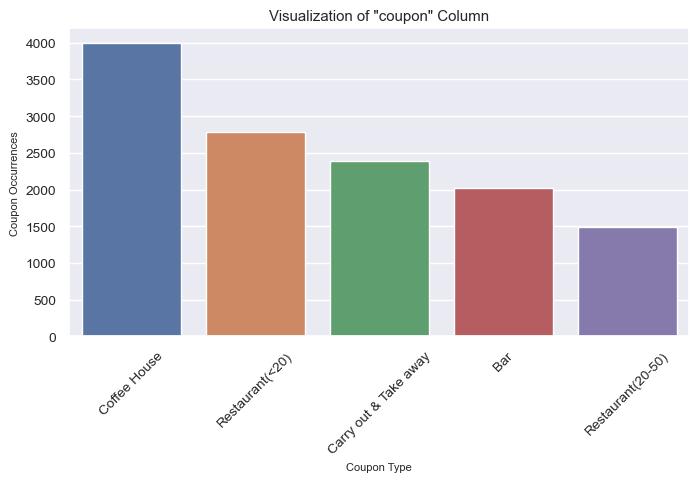

In [23]:
plt.figure(figsize=(8,4))
fig = sns.barplot(x=data.coupon.value_counts().index, y=data.coupon.value_counts())
plt.xticks(rotation=45)
plt.ylabel('Coupon Occurrences', fontsize=8)
plt.xlabel('Coupon Type', fontsize=8)
plt.title('Visualization of "coupon" Column')
plt.savefig('images/bar_coupon.png')
fig

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Temperature Occurrences'>

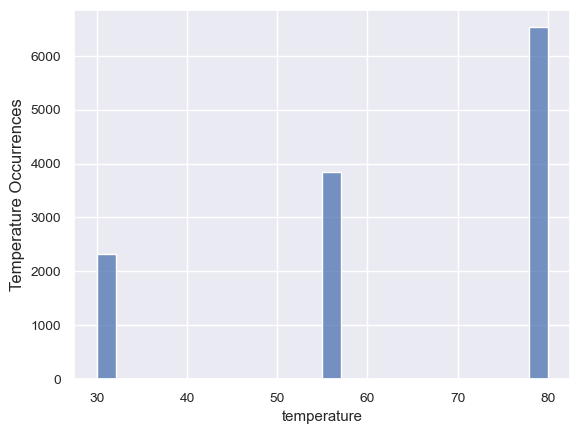

In [24]:
fig = sns.histplot(data.temperature)
plt.ylabel('Temperature Occurrences', fontsize=12)
plt.savefig('images/hist_temperature.png')
fig

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
df_bar = data.query('coupon == "Bar"')
ans = df_bar
df_bar.Bar

9        0.0
13       0.0
17       0.0
24       0.0
35       0.0
        ... 
12663    0.0
12664    0.0
12667    0.0
12670    0.0
12682    0.0
Name: Bar, Length: 2017, dtype: float64

2. What proportion of bar coupons were accepted?


In [26]:
x = df_bar.query('Y == 1').shape[0] / df_bar.shape[0]
ans = f'{x*100:.2f}%'
print(ans)

41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [27]:
x = df_bar.query('Bar <= 3').query('Y == 1').shape[0] / df_bar.query('Bar <= 3').shape[0]
y = df_bar.query('Bar >  3').query('Y == 1').shape[0] / df_bar.query('Bar >  3').shape[0]
ans = {
    'bar_leq3': f'{x*100:.2f}%',
    'bar_gt3':  f'{y*100:.2f}%'
}
print(ans)

{'bar_leq3': '37.07%', 'bar_gt3': '76.88%'}


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [28]:
df2 = df_bar.query('Bar > 1 & age > 25')
df3 = df2.query('Y == 1')
x = df3.shape[0] / df2.shape[0]
ans = f'{x*100:.2f}%'
print(ans)

69.52%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [29]:
q = """ Bar > 1 & passenger != 'Kid(s)' & occupation != 'Farming Fishing & Forestry' """
df2 = df_bar.query(q)
df3 = df2.query('Y == 1')
x = df3.shape[0] / df2.shape[0]
ans = f'{x*100:.2f}%'
print(ans)

print('another way - using agg() with multiple functions simultaneously')
df4 = df_bar.query(q).groupby('Y').agg({'Y': ['sum', 'count']}).reset_index()
print(df4)
x = df4.loc[1, 'Y']['sum'] # 393
y = df4.loc[:, 'Y']['count'].sum() # (393+158)
ans = f'{x/y*100:.2f}%'
print(ans)

71.32%
another way - using agg() with multiple functions simultaneously
   Y           
      sum count
0  0    0   158
1  1  393   393
71.32%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [30]:
queries = [
    """ Bar > 1 & passenger != 'Kid(s)' & maritalStatus != 'Widowed' """,
    """ Bar > 1 & age < 30 """,
    """ RestaurantLessThan20 > 4 & income < 50_000 """,
]
for q in queries:
    df2 = df_bar.query(q)
    # print(q, df2.size) # check if sample size is big enough (size > 30)
    df3 = df2.query('Y == 1')
    x = df3.shape[0] / df2.shape[0]
    ans = f'{x*100:.2f}%'
    print(f'{q.strip()}\n  -> acceptance rate: {ans}')

Bar > 1 & passenger != 'Kid(s)' & maritalStatus != 'Widowed'
  -> acceptance rate: 71.32%
Bar > 1 & age < 30
  -> acceptance rate: 72.17%
RestaurantLessThan20 > 4 & income < 50_000
  -> acceptance rate: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- Driver who is driving with non-kids passenger(s). This can be explained as, acceptance only requires one 'Yes' from all individualsin in the vehicle, however rejection requires everyone responds with 'No'. It is obvious that 
- Driver who is a young adult. 
- Some driver who goes to the bar regularly and frequently.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

 Use the questions below to find customer segementation.
 
 - What about a coffee house?
 - What about if it was just you and your partner in the car?
 - Would weather impact the rate of acceptance? 
 - What about the time of day?

In [31]:
# What about a coffee house?
df_cf = data.query('coupon == "Coffee House"')
print(df_cf.shape)
print(data.shape)
df_cf_1 = df_cf.query('Y==1')
df_cf_0 = df_cf.query('Y==0')
print(df_cf_1.shape)
print(df_cf_0.shape)

(3996, 26)
(12684, 26)
(1995, 26)
(2001, 26)


Test some hypotheses:
- CoffeeHouse vs Y
- occupation vs Y
- time vs Y
- expiration vs Y

<Axes: title={'center': 'CoffeeHouse vs Y'}, xlabel='CoffeeHouse', ylabel='Count'>

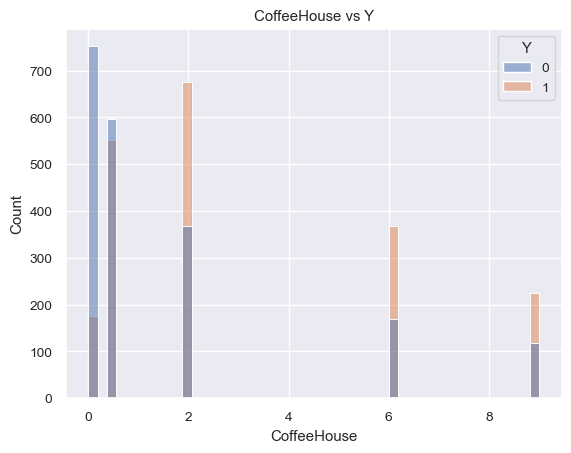

In [32]:
fig = sns.histplot(data=df_cf, x='CoffeeHouse', hue='Y')
plt.title('CoffeeHouse vs Y')
plt.savefig('images/hist_by_CoffeeHouse.png')
fig


   CoffeeHouse  Y_eq_1
0          0.0     175
1          0.5     551
2          2.0     675
3          6.0     369
4          9.0     225
   CoffeeHouse  Y_count
0          0.0      927
1          0.5     1147
2          2.0     1042
3          6.0      538
4          9.0      342
   CoffeeHouse  Y_eq_1  Y_count  acceptance_rate
0          0.0     175      927         0.188781
1          0.5     551     1147         0.480384
2          2.0     675     1042         0.647793
3          6.0     369      538         0.685874
4          9.0     225      342         0.657895


<Axes: title={'center': 'CoffeeHouse vs Acceptance Rate'}, xlabel='CoffeeHouse', ylabel='acceptance_rate'>

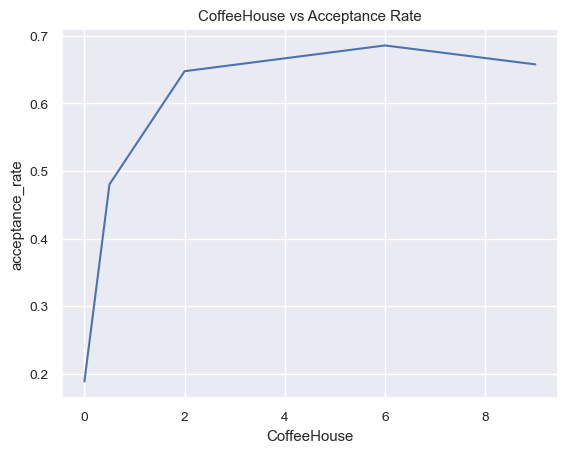

In [33]:
x = df_cf.groupby(['CoffeeHouse']).sum('Y').Y.reset_index(name='Y_eq_1')
print(x)

y = df_cf.groupby(['CoffeeHouse']).size().reset_index(name='Y_count')
print(y)

z = pd.merge(x, y, on='CoffeeHouse')
z['acceptance_rate'] = z.Y_eq_1 / z.Y_count
print(z)

fig = sns.lineplot(data=z, x='CoffeeHouse', y='acceptance_rate')

plt.title('CoffeeHouse vs Acceptance Rate')
plt.savefig('images/CoffeeHouse_acceptance_rate.png')
fig

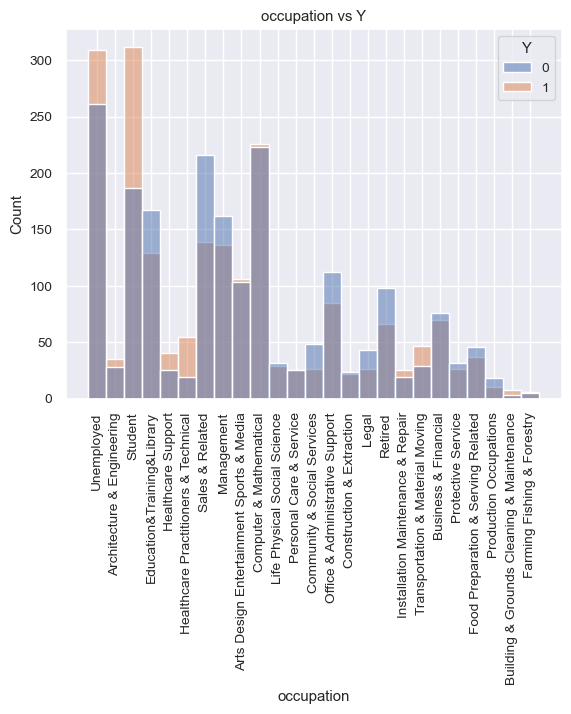

In [34]:
fig = sns.histplot(data=df_cf, x='occupation', hue='Y')
plt.xticks(rotation=90)
plt.title('occupation vs Y')
plt.savefig('images/hist_by_occupation.png')


<Axes: title={'center': 'expiration vs Y'}, xlabel='expiration', ylabel='Count'>

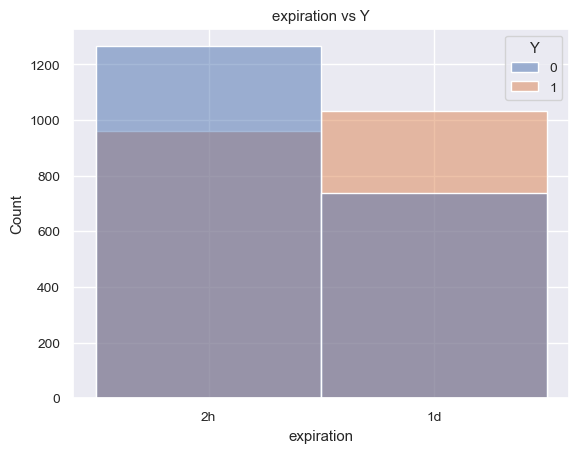

In [35]:
fig = sns.histplot(data=df_cf, x='expiration', hue='Y')
plt.title('expiration vs Y')
plt.savefig('images/hist_by_expiration.png')
fig


<Axes: title={'center': 'time vs Y'}, xlabel='time', ylabel='Count'>

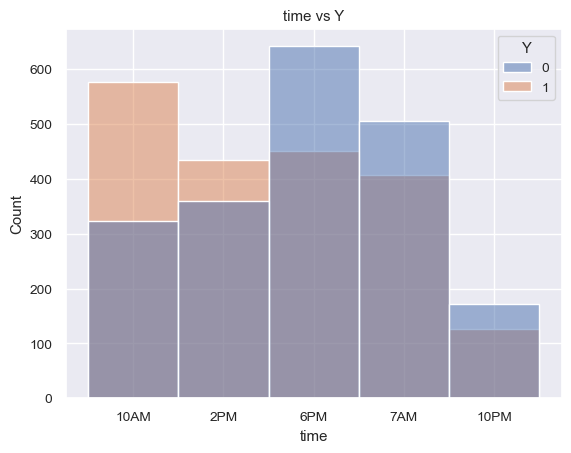

In [36]:
fig = sns.histplot(data=df_cf, x='time', hue='Y')
plt.title('time vs Y')
plt.savefig('images/hist_by_time.png')
fig

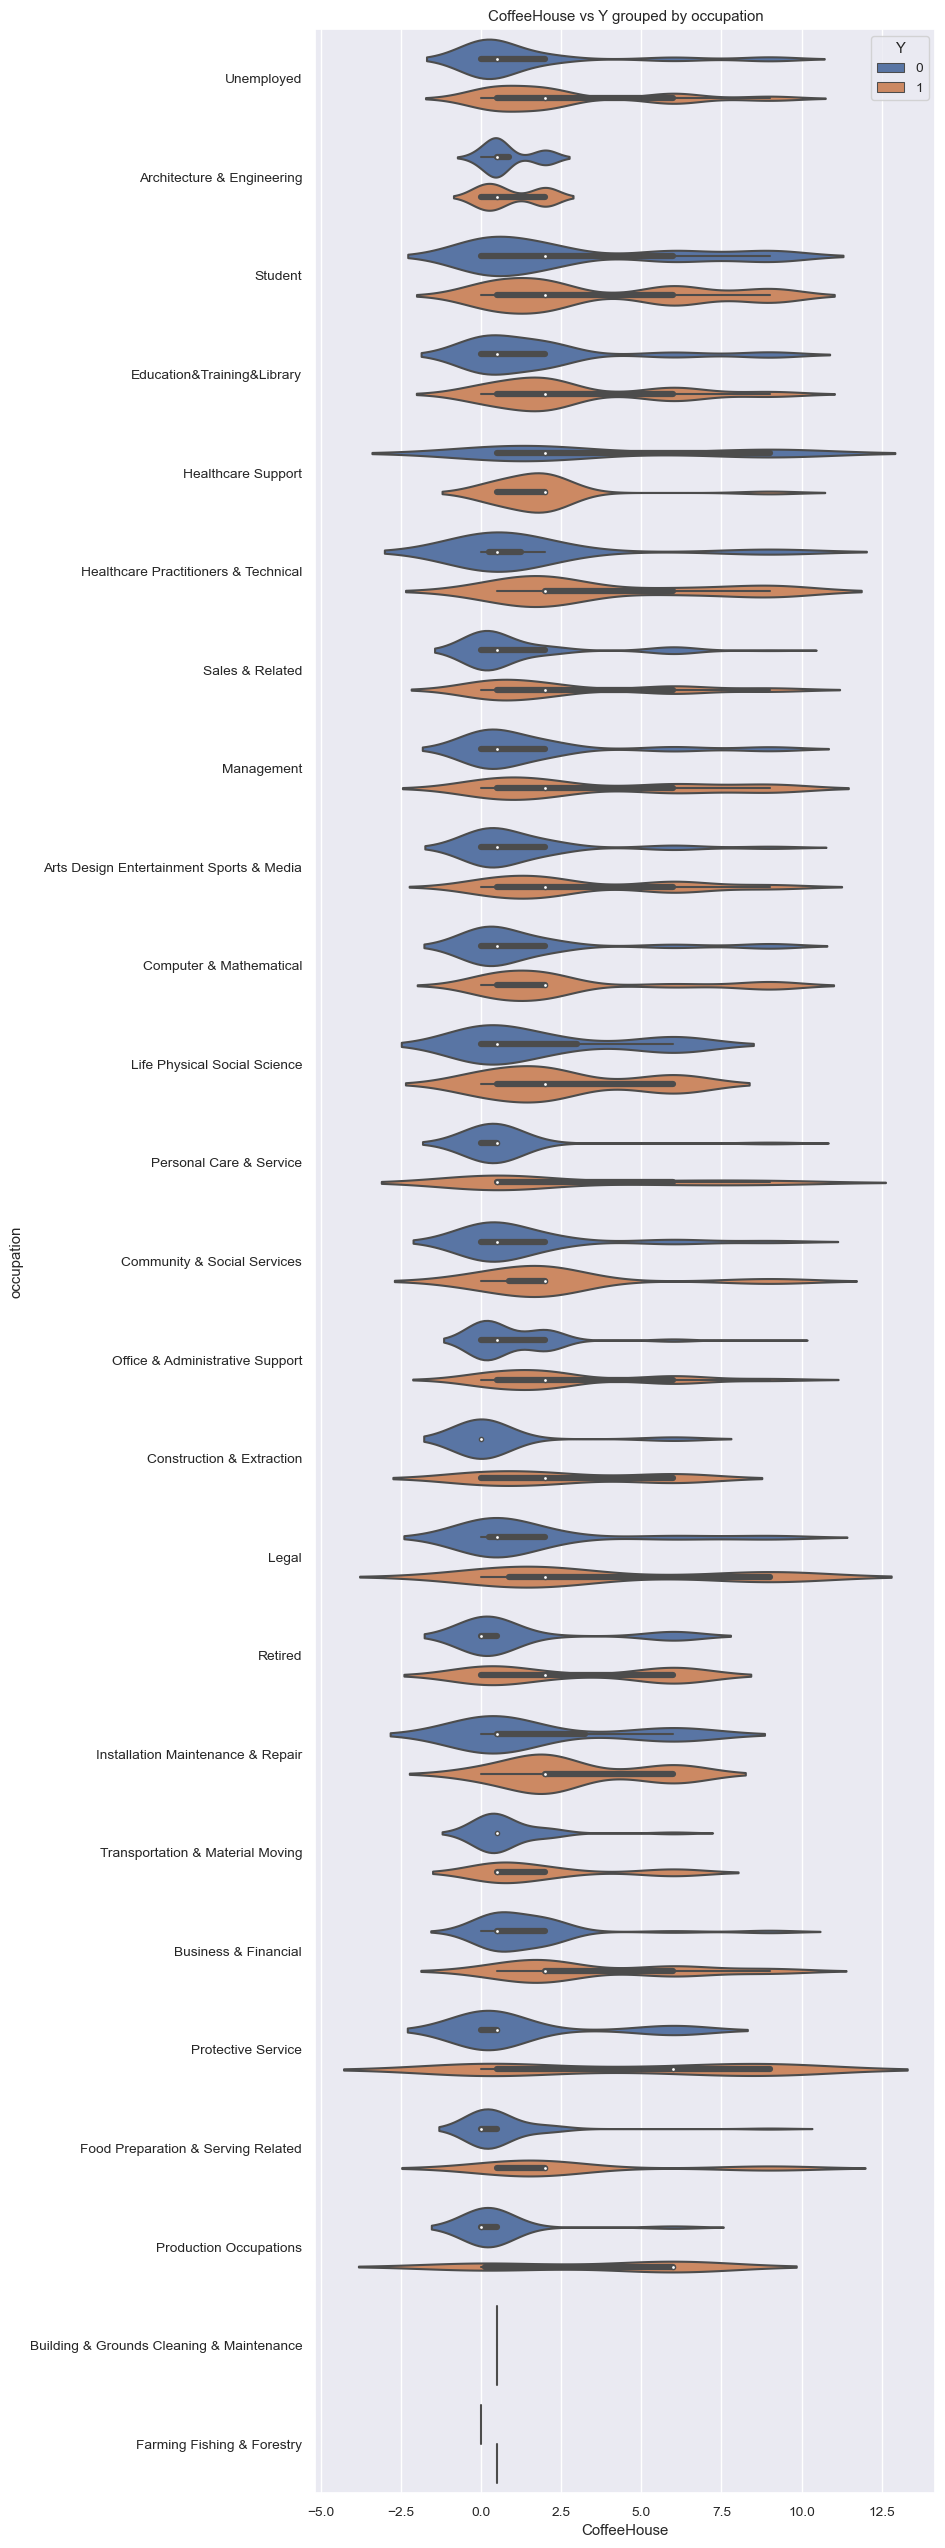

<Axes: title={'center': 'CoffeeHouse vs Y grouped by occupation'}, xlabel='CoffeeHouse', ylabel='occupation'>

In [37]:
plt.figure(figsize=(8, 32))
fig = sns.violinplot(data=df_cf, x='CoffeeHouse', y='occupation', hue='Y', orient='h')
# fig = sns.boxplot(data=df_cf, y='CoffeeHouse', x='occupation', hue='Y')
plt.title('CoffeeHouse vs Y grouped by occupation')
plt.savefig('images/violin_by_CoffeHouse_occupation_time.png')
plt.show()
fig